In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Polynomial Regression
##### This notebook aims to predict where the ISS would be located some time after the last recording, using Polynomial Regression.

In [3]:
# Reading data in
ISS_locations_df = pd.read_csv('/home/stefanie/Python/Find_ISS/Find_ISS/ISS_locations.csv')
ISS_locations_df

,timestamp,latitude,longitude
0,2022-04-11 20:59:33,-34.4130,2.9362
1,2022-04-11 21:00:33,-36.9134,6.3313
2,2022-04-11 21:01:33,-39.2942,9.9669
3,2022-04-11 21:02:33,-41.5185,13.8343
4,2022-04-11 21:03:33,-43.6022,18.0200
...,...,...,...
86,2022-04-11 22:25:32,-15.2545,-39.2972
87,2022-04-11 22:26:32,-18.1845,-36.9443
88,2022-04-11 22:27:32,-21.1021,-34.4821
89,2022-04-11 22:28:32,-23.9745,-31.9120


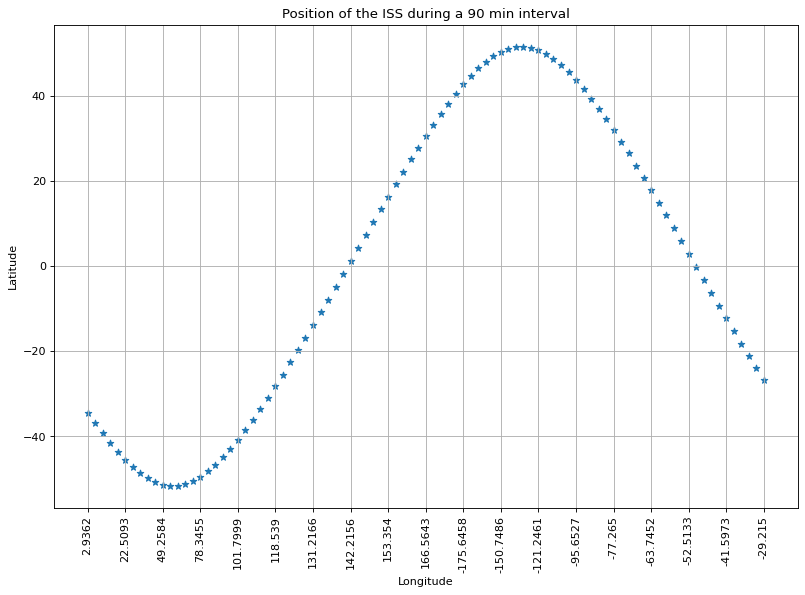

In [4]:
# Plotting the recorded values
plt.figure(figsize=(12, 8), dpi=80)
plt.title('Position of the ISS during a 90 min interval')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.xticks(np.arange(-180, 180, step=5), rotation=90) 
plt.scatter(ISS_locations_df['longitude'].astype(str), ISS_locations_df['latitude'], marker=('*')) #astype(str) is a quickfix preventing matplotlib to sort the longitudes by size

In [5]:
# Hardcoding to keep this notebook clean
x_after_1min = -26.8
x_after_10min = -5.21

Comment: For better predictions we would first have to identify the latitudes after 1 and 10 minutes as a function of time (also applying a polynomial model).

### Training Polynomial Regression Model

In [6]:
# Training process
x = ISS_locations_df['longitude']
y = ISS_locations_df['latitude']

poly_regression = np.poly1d(np.polyfit(x, y, 3)) #chosing 3rd degree

predicted_latitude =  poly_regression(x_after_1min)
print('Predicted position after 1 minute: longitude =', x_after_1min, 'latitude =', predicted_latitude)

predicted_latitude =  poly_regression(x_after_10min)
print('Predicted position after 1 minute: longitude =', x_after_10min, 'latitude =', predicted_latitude)

Predicted position after 1 minute: longitude = -26.8 latitude = -12.493238944360797
Predicted position after 1 minute: longitude = -5.21 latitude = -26.937713600399523


### Plotting the predicted position after 10 minutes

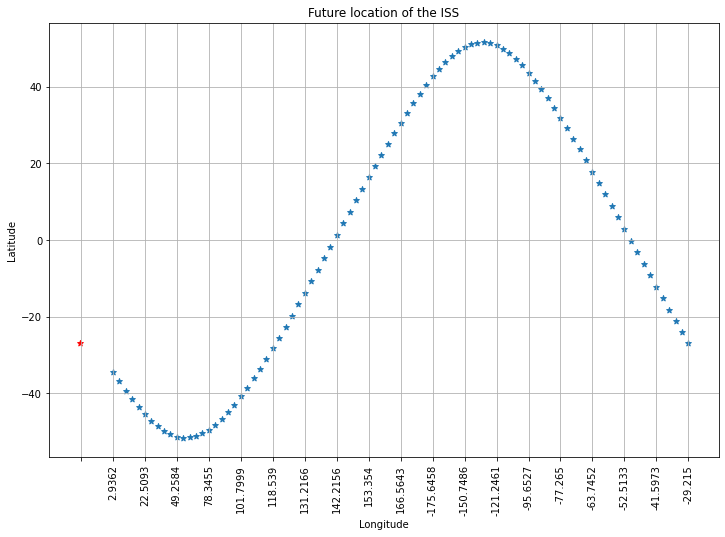

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Future location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.xticks(np.arange(-180, 180, step=5), rotation=90) 
plt.scatter(ISS_locations_df['longitude'].astype(str), ISS_locations_df['latitude'], marker=('*'))
plt.scatter(x_after_10min, [predicted_latitude], color='red', marker=('*'))

Even though the prediction appears to be better than the prediction from linear regession, we need to keep in mind that the curve is shifting to the left a bit with each iteration around Earth. A sequential model might be the better fit.